In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

cat_images = np.random.randn(700, 1, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 1, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 1, 2) + np.array([-3, 3])

In [3]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)
one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

In [4]:
feature_set

array([[[ 0.49671415, -3.1382643 ]],

       [[ 0.64768854, -1.47697014]],

       [[-0.23415337, -3.23413696]],

       ...,

       [[-5.38692987,  2.50412183]],

       [[-1.90269981,  1.43435197]],

       [[-6.00763234,  3.57117941]]])

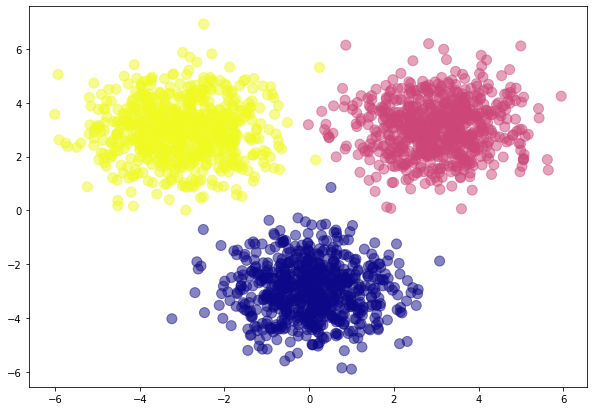

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(np.squeeze(feature_set[:,:,0], axis = 1), 
            np.squeeze(feature_set[:,:,1], axis = 1), 
            c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [6]:
one_hot_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [7]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [8]:
feature_set.shape

(2100, 1, 2)

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (1, 2)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(256, activation = 'sigmoid'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',  #[0,1,2] = labels
              metrics = ['accuracy'])

In [11]:
model.fit(feature_set, labels, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 1s 432us/sample - loss: 0.2333 - acc: 0.9543
Epoch 2/10
2100/2100 [==============================] - 0s 165us/sample - loss: 0.0100 - acc: 0.9981
Epoch 3/10
2100/2100 [==============================] - 0s 83us/sample - loss: 0.0065 - acc: 0.9986
Epoch 4/10
2100/2100 [==============================] - 0s 100us/sample - loss: 0.0070 - acc: 0.9981
Epoch 5/10
2100/2100 [==============================] - 0s 147us/sample - loss: 0.0076 - acc: 0.9976
Epoch 6/10
2100/2100 [==============================] - 0s 213us/sample - loss: 0.0059 - acc: 0.9976
Epoch 7/10
2100/2100 [==============================] - 0s 156us/sample - loss: 0.0046 - acc: 0.9986
Epoch 8/10
2100/2100 [==============================] - 1s 274us/sample - loss: 0.0039 - acc: 0.9986
Epoch 9/10
2100/2100 [==============================] - 0s 198us/sample - loss: 0.0055 - acc: 0.9981
Epoch 10/10
2100/2100 [==============================] - 1s 283us/sample - loss: 0.0046 - ac

In [12]:
np.argmax(model.predict(np.array([[[-10, -10]]])))

0

In [13]:
import matplotlib.pyplot as plt

In [14]:
def predmap(x,y):
    n = np.argmax(model.predict(np.array([[[x, y]]])))

    if n == 0:
        color = 'blue'
    elif n == 1:
        color = 'green'
    elif n == 2:
        color = 'yellow'
    else:
        color = 'nao sei'
    return color

In [15]:
blue = []
green = []
yellow = []
for i in np.arange(-7, 7, 0.25):
    for j in np.arange(-7, 7, 0.25):
        color = predmap(i,j)
        if color == 'green':
            green.append([i, j])
        elif color == 'blue':
            blue.append([i, j])
        elif color == 'yellow':
            yellow.append([i, j])
        
blue = np.array(blue)
green = np.array(green)
yellow = np.array(yellow)

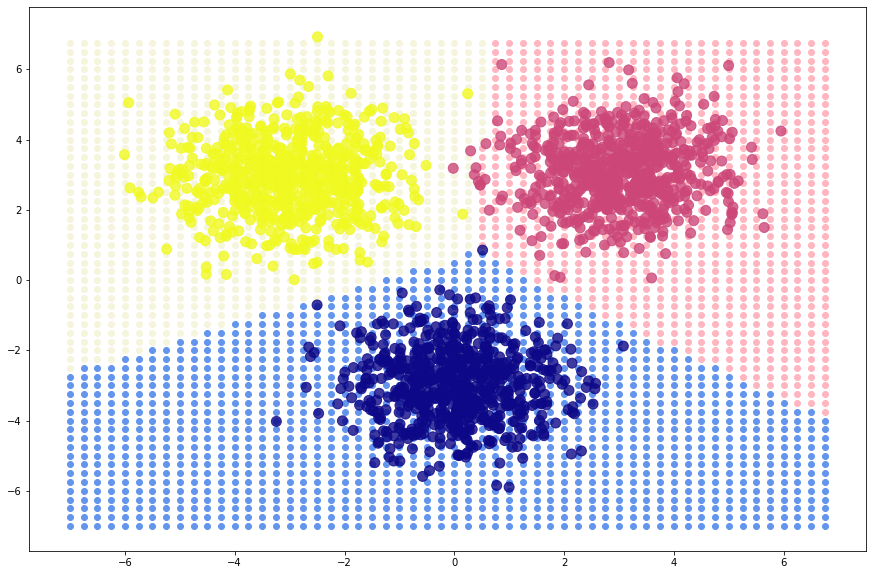

In [16]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
cores = list(colors.keys())[8:]
    
plt.figure(figsize=(15,10))
np.random.seed(0)
try:
    plt.scatter(list(blue[:,0]), list(blue[:,1]), color=cores[17])
    plt.scatter(list(green[:,0]), list(green[:,1]), color=cores[74])
    plt.scatter(list(yellow[:,0]), list(yellow[:,1]), color=cores[5])
except:
    pass
plt.scatter(np.squeeze(feature_set[:,:,0], axis=1), 
            np.squeeze(feature_set[:,:,1], axis=1),
            c=labels, cmap='plasma', s=100, alpha=0.8)
plt.show()